# Decision Tree used to identify the drugs!

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [22]:
df.describe()

,Age,Na_to_K,Cholesterol_n,BP_n,Sex_n,Drug_n
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.485000,0.910000,0.520000,2.870000
std,16.544315,7.223956,0.501029,0.821752,0.500854,1.372047
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,2.000000
50%,45.000000,13.936500,0.000000,1.000000,1.000000,3.000000
75%,58.000000,19.380000,1.000000,2.000000,1.000000,4.000000
max,74.000000,38.247000,1.000000,2.000000,1.000000,4.000000


In [23]:
df.columns

Index(['Age', 'Na_to_K', 'Cholesterol_n', 'BP_n', 'Sex_n', 'Drug_n'], dtype='object')

In [24]:
df.dtypes

Age                int64
Na_to_K          float64
Cholesterol_n      int32
BP_n               int32
Sex_n              int32
Drug_n             int32
dtype: object

In [16]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [17]:
le_target = LabelEncoder()
le_Cholesterol = LabelEncoder()
le_BP = LabelEncoder()
le_Sex = LabelEncoder()

### Here we have converted our data into numerical format

In [18]:
df['Cholesterol_n']=le_Cholesterol.fit_transform(df['Cholesterol'])
df['BP_n']=le_BP.fit_transform(df['BP'])
df['Sex_n']=le_Sex.fit_transform(df['Sex'])
df['Drug_n']=le_target.fit_transform(df['Drug'])

In [19]:
df = df.drop(['Sex','BP','Cholesterol','Drug'],axis=1)

In [20]:
target=df['Drug_n']

df1 = df.drop(['Drug_n'],axis=1)
df1.head()

,Age,Na_to_K,Cholesterol_n,BP_n,Sex_n
0,23,25.355,0,0,0
1,47,13.093,0,1,1
2,47,10.114,0,1,1
3,28,7.798,0,2,0
4,61,18.043,0,1,0


In [21]:
df.corr()

,Age,Na_to_K,Cholesterol_n,BP_n,Sex_n,Drug_n
Age,1.000000,-0.063119,-0.068234,0.054212,0.102027,-0.004828
Na_to_K,-0.063119,1.000000,0.010000,-0.149312,-0.125008,0.589120
Cholesterol_n,-0.068234,0.010000,1.000000,-0.137552,-0.008811,0.055629
BP_n,0.054212,-0.149312,-0.137552,1.000000,-0.007814,0.372868
Sex_n,0.102027,-0.125008,-0.008811,-0.007814,1.000000,-0.098573
Drug_n,-0.004828,0.589120,0.055629,0.372868,-0.098573,1.000000


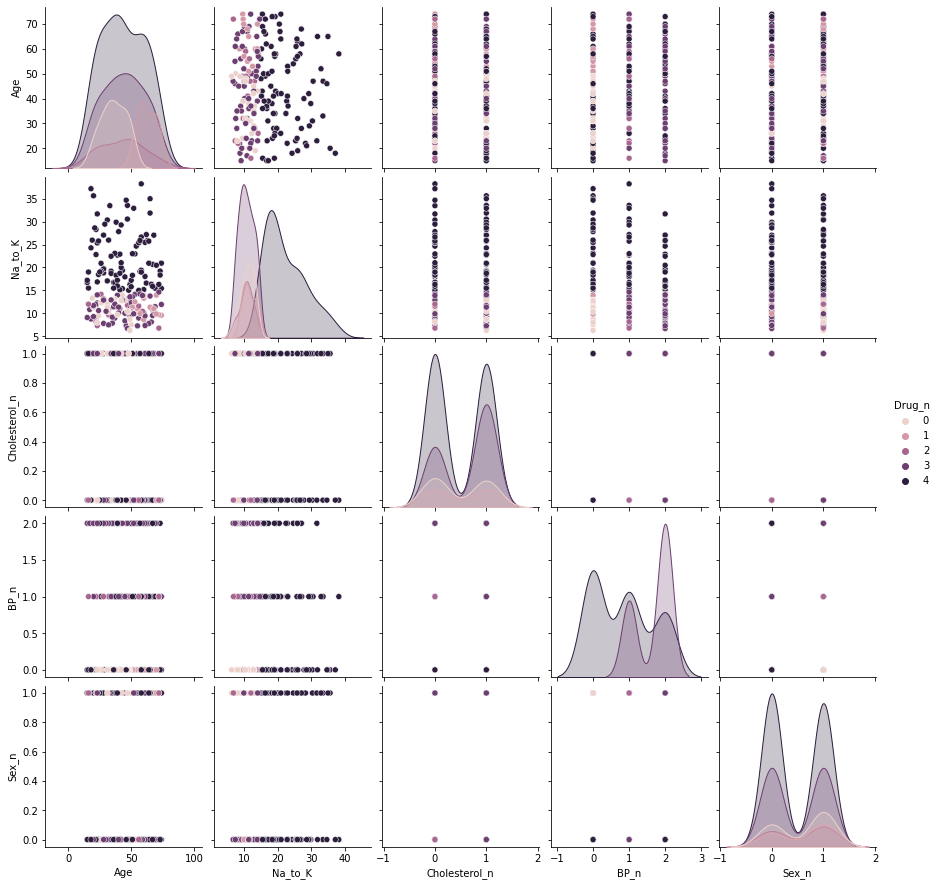

In [51]:
sns.pairplot(data=df,hue='Drug_n')

<AxesSubplot:>

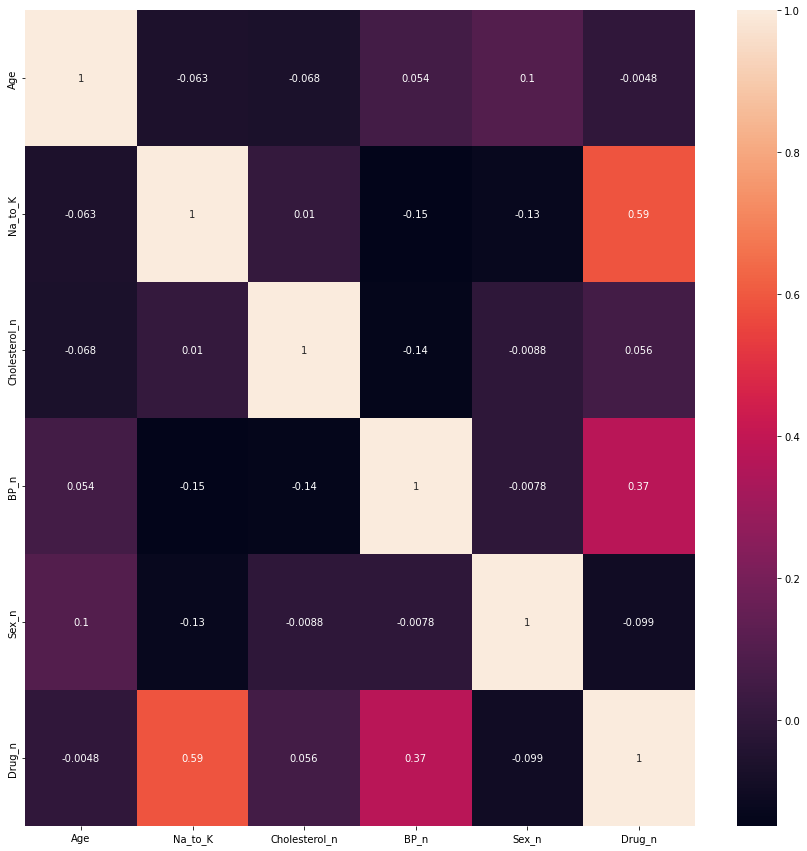

In [25]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(df1,target,test_size=0.2,random_state=42)
print('Input Train Size:',x_train.shape)
print('Input Train Size:',x_test.shape)

Input Train Size: (160, 5)
Input Train Size: (40, 5)


In [29]:
datatree = DecisionTreeClassifier()
datatree.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = datatree.predict(x_test)
print('Classification tree report \n',classification_report(y_test,y_pred))

Classification tree report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [49]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

Text(0.5, 1.0, 'Accuracy score: 1.0')

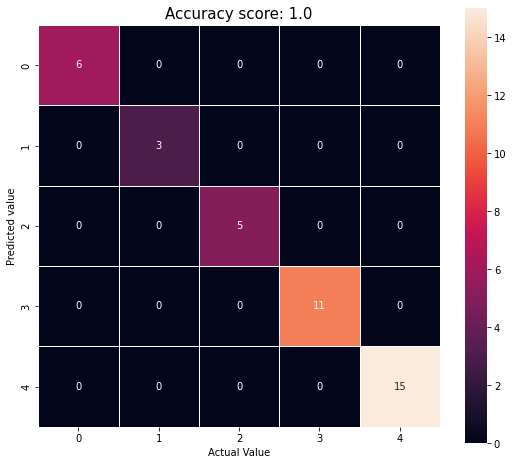

In [50]:
plt.figure(figsize=(9, 8))
sns.heatmap(cm,square=True,linewidth = 0.5,annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
title = 'Accuracy score: {0}'.format(datatree.score(x_test,y_test))
plt.title(title,size=15)

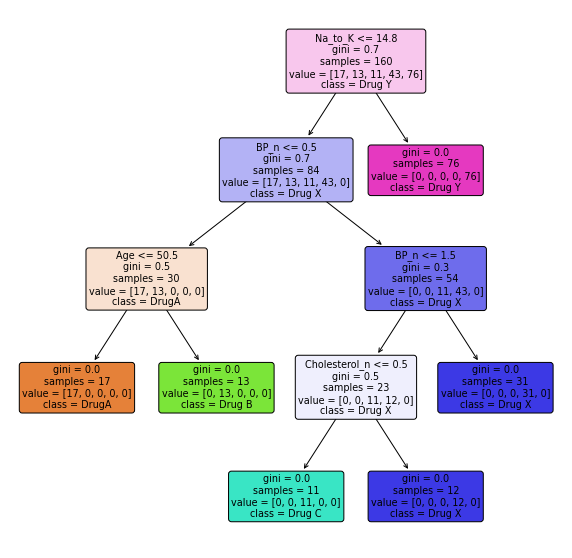

In [42]:
plt.figure(figsize=(10, 10))
dec_tree = plot_tree(decision_tree = datatree, feature_names = df1.columns, 
                   class_names = ['DrugA','Drug B','Drug C','Drug X','Drug Y'],
                   rounded = True,filled = True,precision = True)

Don't forget to follow me on [Medium](https://medium.com/@borhadepiyush) | [GitHub](https://github.com/PiyushBorhade) | [Linkedin](https://www.linkedin.com/in/piyush-borhade/) | [Kaggle](https://www.kaggle.com/piyushborhade) | [YouTube](https://www.youtube.com/channel/UCeFRxm0sPqPe3U6zWfN1DKg) 😎